<a href="https://colab.research.google.com/github/sivasaiyadav8143/Machine_Learning_Projects/blob/main/Google_Store_App_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Store App Rating Prediction

## Problem statement

The Play Store apps data has enormous potential to drive app-making businesses to success. However, many apps are being developed every single day and only a few of them become profitable. It is important for developers to be able to predict the success of their app and incorporate features which makes an app successful. We can collect app data and user ratings from the app stores and use it to extract insightful information. A machine learning model can be used to predict rating for a given app, which can be used to estimate success and scope of improvement.

As part of this exercise we will try to predict rating for an app given features like size, number of downloads, etc.

## Data Set Information


Shape - 10841 entries and 13 columns

Attributes -

App: Application name

Category: Category the app belongs to

Rating: Overall user rating of the app

Reviews: Number of user reviews for the app

Size: Size of the app

Installs: Number of user downloads/installs for the app

Type: Paid or Free

Price: Price of the app

Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult

Genres: An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.

Last Updated: Date when the app was last updated on Play Store

Current Ver: Current version of the app available on Play Store

Android Ver: Min required Android version

In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [ ]:
app = pd.read_csv('Apps_data.csv')

In [ ]:
app.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


Andriod supports rating from 1-5 but we could see max value is 19, which is wrong, this might be 1.9. Need to dig more.

In [ ]:
app.describe(include='O')

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


For predict rating of an app, we dont need columns like Last Updated, Current Ver and Android Ver. we can remove them.


In [ ]:
app.shape

(10841, 13)

In [ ]:
app.App.nunique() / len(app)

0.8910617101743381

In [ ]:
((app.nunique()/ len(app) )* 100).sort_values(ascending = False)

App               89.106171
Reviews           55.363896
Current Ver       26.123051
Last Updated      12.711005
Size               4.261599
Genres             1.106909
Price              0.857854
Rating             0.368970
Category           0.313624
Android Ver        0.304400
Installs           0.202933
Content Rating     0.055345
Type               0.027673
dtype: float64

In [ ]:
# app.drop(columns=['App'],inplace=True)

In [ ]:
# app.head()

In [ ]:
kb_index = app.Size[app.Size.str.contains('k')].index
mb_index = app.Size[~(app.Size.str.contains('k'))].index
print(f"Count of KB's Apps : {len(kb_index)}")
print(f"Count of MB's Apps : {len(mb_index)}")

Count of KB's Apps : 316
Count of MB's Apps : 10525


In [ ]:
# lets convert size of the app from KB to MB
# app.Size.iloc[kb_index] * 1000

In [ ]:
app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
app.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


Max count rating is 19 which is wrong and also count is 9367 some records are missing.

In [ ]:
app.Category.value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [ ]:
app.describe(include='O')

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


1. Most of apps(1972) are belongs to category of type Family.
2. 5% of the apps were not even revied. This might be either the apps were new or failed to reach customers.
3. Most of the apps(92% of the apps) in the play store are free to download.
4. Most of the apps(80%) are made to use everyone.
5. Seems some apps are duplicated , need to confirm and remove to avoid data leakage.

In [ ]:
app.App.value_counts(dropna=False).head(10)
# seems some apps are duplicated, before dropping them lest makesure if they are really duplicated

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
8 Ball Pool                                           7
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
Sniper 3D Gun Shooter: Free Shooting Games - FPS      6
Nick                                                  6
Bleacher Report: sports news, scores, & highlights    6
Bubble Shooter                                        6
Name: App, dtype: int64

In [ ]:
# app[app.duplicated()].sort_values(by='App')
# Lets check with some apps instead of all at once
app[app.App.isin(['ROBLOX','ESPN'])].sort_values(by='App')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2959,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3010,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3018,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3048,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3060,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3072,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
4069,ESPN,SPORTS,4.2,521081,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


We can see that these apps are duplicated with a minor differene in no.of Reviews observed. We can go ahead and remove them.

In [ ]:
# drop all duplicated records
app.drop_duplicates(subset='App',inplace=True)

In [ ]:
# app[app.duplicated()]
# it shows no duplicates

In [ ]:
# it shows no duplicates
app.App.value_counts()

Silence Premium Do Not Disturb    1
C Pattern Programs Free           1
K PLUS                            1
Curriculum Vitae - Resume CV      1
101 C Programming Problems        1
                                 ..
How Old am I?                     1
Grenada Co-operative Bank         1
Blibli.com Online Shopping        1
Plugin:AOT v5.0                   1
BI Mobile Banking                 1
Name: App, Length: 9660, dtype: int64

In [ ]:
print('{}% of records were duplicates'.format((round(1 - (app.shape[0] / 10841),3)* 100)))

10.9% of records were duplicates


In [ ]:
app.Category.unique()
# a category 1.9 looks suspicious

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [ ]:
app.Genres.unique()
# even in Genre we see a suspicious value('February 11, 2018'),lets what are those records

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [ ]:
app.query('Category == "1.9"')
# both suspicious values are from same record, seems like error in data entry

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
# delete the record
app.drop(index=[10472],inplace=True)

In [ ]:
app.query('Category == "1.9"')
# record is dropped

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

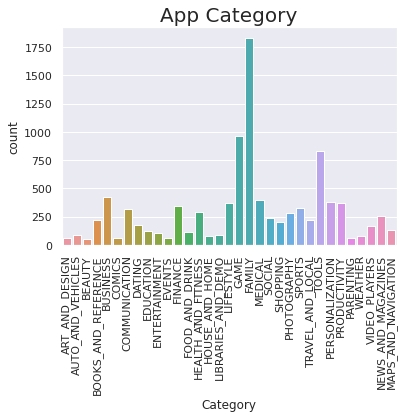

In [ ]:
p = sns.set(style="darkgrid")
p = sns.countplot(x='Category',data=app)
_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels
plt.title('App Category',size = 20);

In [ ]:
len(app.Category[app.Category.isin(['TOOLS','FAMILY','GAME'])]) / len(app)

0.3745729371570556

Most of the applicatons belongs to Family, Game and tools, almost 37% of the apps are from top 3 categories.

In [ ]:
app.Rating.describe()

count    8196.000000
mean        4.173243
std         0.536625
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

The rating is on a scale on 1-5, with 1 being minimum and 5 being maximum. The mean rating is 4.17 and the median rating is 4.3, i.e average rating is above 4.17

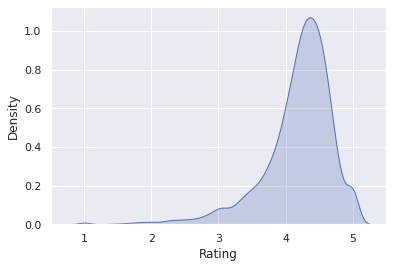

In [ ]:
sns.kdeplot(app.Rating,shade=True)

In [ ]:
app.isna().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [ ]:
# drop rating NA's
#TODO : USE IMPUTERS TO FILL NA's
app.dropna(subset=['Rating'],inplace=True)

In [ ]:
app.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

In [ ]:
#convert ratings to high and low categories.
app['Rating_cat'] = app.Rating.apply(lambda x : 'High' if x >= 3.5 else 'Low')

In [ ]:
app.sample(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_cat
9328,EG Movi,TOOLS,4.2,40,7.4M,"1,000+",Free,0,Everyone,Tools,"May 12, 2017",0.9.1,3.2 and up,High
3825,Transit: Real-Time Transit App,MAPS_AND_NAVIGATION,4.2,43269,Varies with device,"5,000,000+",Free,0,Everyone,Maps & Navigation,"July 18, 2018",4.4.7,Varies with device,High


In [ ]:
app.shape

(8196, 14)

In [ ]:
app.Rating_cat.value_counts(normalize=True)

High    0.912396
Low     0.087604
Name: Rating_cat, dtype: float64

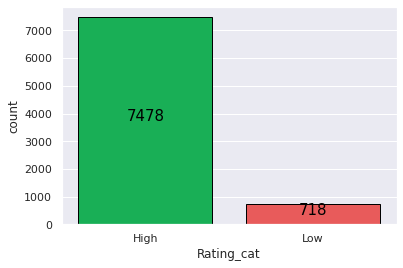

In [ ]:
plot = sns.countplot(app.Rating_cat, edgecolor = 'black', palette = [ '#00C851','#ff4444'])

bars = plot.patches
plot.annotate(bars[0].get_height(), (0, bars[0].get_height()/2),
              ha = 'center', fontsize = 15, color = 'black')

plot.annotate(bars[1].get_height(), (1, bars[1].get_height()/2),
              ha = 'center', fontsize = 15, color = 'black')

plt.show()


In [ ]:
# Convert Reviews to numeric
app.Reviews = app.Reviews.astype('int') 

In [ ]:
app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8196 non-null   object 
 1   Category        8196 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         8196 non-null   int64  
 4   Size            8196 non-null   object 
 5   Installs        8196 non-null   object 
 6   Type            8196 non-null   object 
 7   Price           8196 non-null   object 
 8   Content Rating  8196 non-null   object 
 9   Genres          8196 non-null   object 
 10  Last Updated    8196 non-null   object 
 11  Current Ver     8192 non-null   object 
 12  Android Ver     8194 non-null   object 
 13  Rating_cat      8196 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.3+ MB


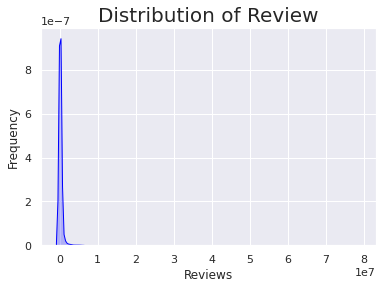

In [ ]:
# Review distibution 
g = sns.kdeplot(app.Reviews,shade=True,color='blue')
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")
plt.title('Distribution of Review',size = 20);

In [ ]:
app.Reviews.head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: int64

In [ ]:
app.sort_values(by='Reviews',ascending=False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_cat
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,High
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,High
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,High
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,High
1670,Clash of Clans,GAME,4.6,44891723,98M,"100,000,000+",Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up,High


As we can see Facebook, Whatsapp, Instagram and messenger have highest reviews.
All these apps are freely available and social and communication.

In [ ]:
app.Size.value_counts().head()

Varies with device    1169
14M                    149
12M                    146
11M                    144
13M                    143
Name: Size, dtype: int64

In [ ]:
app1 = app.copy()

In [ ]:
app.shape

(8196, 14)

In [ ]:
kb_index = app1.Size[app1.Size.str.contains('k')].index
mb_index = app1.Size[(app1.Size.str.contains('M'))].index
print(f"No.of App's in KB's : {len(kb_index)}")
print(f"No.of App's in MB's : {len(mb_index)}")

No.of App's in KB's : 256
No.of App's in MB's : 6771


In [ ]:
# convert app size in KB's
app1.Size = app1.Size.str.replace('M','')
app1.Size = app1.Size.str.replace('k','')


In [ ]:
app1.Size.value_counts().head()
# app.Size.head()

Varies with device    1169
14                     150
12                     146
11                     145
13                     143
Name: Size, dtype: int64

In [ ]:
#this to_numeric() converts to float(default) and non-numeric values will be replaced with NAN 
app1.Size = pd.to_numeric(app1.Size,errors='coerce')

In [ ]:
app1.shape

(8196, 14)

In [ ]:
app1.Size.value_counts(dropna=False).head()

NaN     1169
14.0     150
12.0     146
11.0     145
13.0     143
Name: Size, dtype: int64

In [ ]:
app1.isna().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1169
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          4
Android Ver          2
Rating_cat           0
dtype: int64

In [ ]:
app1.Size.head()

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: float64

In [ ]:
# app.Size.loc[]
# app.Size[(list(kb_index) + list(mb_index))]
# app.Size

In [ ]:
app1.Size.loc[mb_index] = app1.Size.loc[mb_index] * 1000
app1.Size.tail()

10834     2600.0
10836    53000.0
10837     3600.0
10839        NaN
10840    19000.0
Name: Size, dtype: float64

In [ ]:
app1.Size.loc[mb_index].isna().sum()

0

In [ ]:
# app1.Size.loc[kb_index]
app.Size.loc[kb_index].isna().sum()

0

In [ ]:
app1.isna().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1169
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          4
Android Ver          2
Rating_cat           0
dtype: int64

In [ ]:
app1.dropna(subset=['Size'],inplace=True)

In [ ]:
app1.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
Rating_cat        0
dtype: int64

In [ ]:
app1.shape

(7027, 14)

In [ ]:
app1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7027 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7027 non-null   object 
 1   Category        7027 non-null   object 
 2   Rating          7027 non-null   float64
 3   Reviews         7027 non-null   int64  
 4   Size            7027 non-null   float64
 5   Installs        7027 non-null   object 
 6   Type            7027 non-null   object 
 7   Price           7027 non-null   object 
 8   Content Rating  7027 non-null   object 
 9   Genres          7027 non-null   object 
 10  Last Updated    7027 non-null   object 
 11  Current Ver     7023 non-null   object 
 12  Android Ver     7025 non-null   object 
 13  Rating_cat      7027 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 823.5+ KB


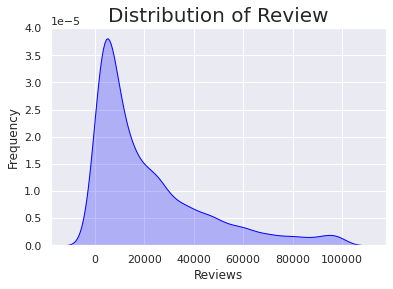

In [ ]:
# Review distibution 
g = sns.kdeplot(app1.Size,shade=True,color='blue')
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")
plt.title('Distribution of Review',size = 20);

In [ ]:
app1.Installs.value_counts()

1,000,000+        1175
100,000+           989
10,000+            948
1,000+             674
10,000,000+        646
500,000+           461
5,000,000+         450
50,000+            427
5,000+             413
100+               297
500+               195
50,000,000+        111
100,000,000+        96
10+                 67
50+                 56
5+                   9
500,000,000+         8
1+                   3
1,000,000,000+       2
Name: Installs, dtype: int64

In [ ]:
app1.Installs = app1.Installs.str.replace(',','').str.replace('+','')#.value_counts()

In [ ]:
app1.Installs.unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000', '500000000',
       '100', '500', '10', '1000000000', '5', '50', '1'], dtype=object)

In [ ]:
# convert to numerical 
app1.Installs = pd.to_numeric(app1.Installs,errors='coerce')

In [ ]:
app1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7027 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7027 non-null   object 
 1   Category        7027 non-null   object 
 2   Rating          7027 non-null   float64
 3   Reviews         7027 non-null   int64  
 4   Size            7027 non-null   float64
 5   Installs        7027 non-null   int64  
 6   Type            7027 non-null   object 
 7   Price           7027 non-null   object 
 8   Content Rating  7027 non-null   object 
 9   Genres          7027 non-null   object 
 10  Last Updated    7027 non-null   object 
 11  Current Ver     7023 non-null   object 
 12  Android Ver     7025 non-null   object 
 13  Rating_cat      7027 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 823.5+ KB


In [ ]:
sorted(app1.Installs.unique())

[1,
 5,
 10,
 50,
 100,
 500,
 1000,
 5000,
 10000,
 50000,
 100000,
 500000,
 1000000,
 5000000,
 10000000,
 50000000,
 100000000,
 500000000,
 1000000000]

In [ ]:
# pandas replace can replace list - list
app1['Install_cat'] = app1.Installs.replace(sorted(app1.Installs.unique()),range(0,len(sorted(app1.Installs.unique())),1))

In [ ]:
app1.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_cat,Install_cat
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High,8
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High,11
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High,13


In [ ]:
app1.Install_cat.value_counts()

12    1175
10     989
8      948
6      674
14     646
11     461
13     450
9      427
7      413
4      297
5      195
15     111
16      96
2       67
3       56
1        9
17       8
0        3
18       2
Name: Install_cat, dtype: int64

In [ ]:
app1.Type.describe()

count     7027
unique       2
top       Free
freq      6486
Name: Type, dtype: object

In [ ]:
app1.Type.value_counts(normalize=True)

Free    0.923011
Paid    0.076989
Name: Type, dtype: float64

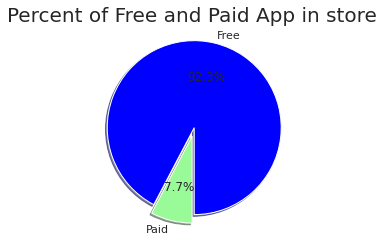

In [ ]:
# plt.pie(app1.Type.value_counts(normalize=True));
# Data to plot
labels =app1['Type'].value_counts(sort = True).index
sizes = app1['Type'].value_counts(sort = True)

colors = ["Blue","Palegreen"]
explode = (0.1,0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=270)

plt.title('Percent of Free and Paid App in store',size = 20)
plt.show()

In [ ]:
app1.Price.value_counts()

0         6486
$0.99      103
$2.99       97
$4.99       61
$1.99       53
          ... 
$39.99       1
$19.40       1
$1.61        1
$2.90        1
$7.49        1
Name: Price, Length: 68, dtype: int64

In [ ]:
# app1.Price.describe()

In [ ]:
app1.Price = app1.Price.str.replace('$','')

In [ ]:
app1.Price = pd.to_numeric(app1.Price,errors='coerce')

In [ ]:
app1.Price.describe()

count    7027.000000
mean        1.173572
std        18.197602
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

Seems most of the apps are free to use, and max price of an app is $400

In [ ]:
app1[app1.Price == 400]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_cat,Install_cat
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,High,8


'I'm Rich - Trump Edition' is the highest priced ($400) app in Play Store.

In [ ]:
app1['Content Rating'].value_counts()

Everyone           5682
Teen                779
Mature 17+          304
Everyone 10+        259
Adults only 18+       2
Unrated               1
Name: Content Rating, dtype: int64

In [ ]:
app1['Content Rating'] = app1['Content Rating'].str.split(n=1,expand=True)[0]

In [ ]:
app1['Content Rating'].value_counts()

Everyone    5941
Teen         779
Mature       304
Adults         2
Unrated        1
Name: Content Rating, dtype: int64

In [ ]:
app1[app1['Content Rating'] == 'Unrated']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_cat,Install_cat
8266,DC Universe Online Map,TOOLS,4.1,1186,6400.0,50000,Free,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up,High,9


In [ ]:
app1[app1['Content Rating'] == 'Adults']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_cat,Install_cat
298,Manga Master - Best manga & comic reader,COMICS,4.6,24005,4900.0,500000,Free,0.0,Adults,Comics,"July 4, 2018",1.1.7.0,4.1 and up,High,11
3043,DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017,41000.0,1000000,Free,0.0,Adults,Sports,"July 24, 2018",3.21.324,4.4 and up,High,12


In [ ]:
app1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7027 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7027 non-null   object 
 1   Category        7027 non-null   object 
 2   Rating          7027 non-null   float64
 3   Reviews         7027 non-null   int64  
 4   Size            7027 non-null   float64
 5   Installs        7027 non-null   int64  
 6   Type            7027 non-null   object 
 7   Price           7027 non-null   float64
 8   Content Rating  7027 non-null   object 
 9   Genres          7027 non-null   object 
 10  Last Updated    7027 non-null   object 
 11  Current Ver     7023 non-null   object 
 12  Android Ver     7025 non-null   object 
 13  Rating_cat      7027 non-null   object 
 14  Install_cat     7027 non-null   int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 878.4+ KB


In [ ]:
app1.drop(columns=['App','Genres','Last Updated','Current Ver','Android Ver'],inplace=True)

In [ ]:
app1.sample(5)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Rating_cat,Install_cat
8031,FAMILY,3.2,3069,18000.0,500000,Free,0.00,Teen,Low,11
2021,FAMILY,4.5,5761,21000.0,1000000,Free,0.00,Everyone,High,12
1052,FINANCE,3.8,42644,19000.0,5000000,Free,0.00,Everyone,High,13
5081,PHOTOGRAPHY,4.3,2215,12000.0,500000,Free,0.00,Everyone,High,11
4487,PERSONALIZATION,4.8,18,16000.0,5000,Paid,1.49,Everyone,High,7


In [ ]:
 app_dummy = app1.copy()

In [ ]:
# method : 1 
app_dummy = pd.get_dummies(app_dummy,columns=['Category','Type','Content Rating','Rating_cat'],drop_first=True)

In [ ]:
app_dummy.head(2)

,Rating,Reviews,Size,Installs,Price,Install_cat,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content Rating_Everyone,Content Rating_Mature,Content Rating_Teen,Content Rating_Unrated,Rating_cat_Low
0,4.1,159,19000.0,10000,0.0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,3.9,967,14000.0,500000,0.0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
catenc_dummy = app1.copy()

In [ ]:
!pip install category-encoders

     |████████████████████████████████| 81kB 1.8MB/s 


In [ ]:
# method : 2 
import category_encoders as ce

tar = { 'Low' : 0 , 'High' : 1 }

# catenc_dummy.replace({"Rating_cat": tar}) #method : 1 of mapping
catenc_dummy['Rating_cat'] = catenc_dummy.Rating_cat.map(tar) #method : 2


In [ ]:
catenc_dummy[:1]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Rating_cat,Install_cat
0,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,1,8


In [ ]:
X_dummy = app_dummy.drop(columns=['Rating','Rating_cat_Low'],axis=1)
y_dummy = app_dummy.loc[:,'Rating_cat_Low']
X_dummy.shape, y_dummy.shape

((7027, 42), (7027,))

In [ ]:
X_dummy.head(2)

,Reviews,Size,Installs,Price,Install_cat,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content Rating_Everyone,Content Rating_Mature,Content Rating_Teen,Content Rating_Unrated
0,159,19000.0,10000,0.0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,967,14000.0,500000,0.0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
y_dummy.head(2)

0    0
1    0
Name: Rating_cat_Low, dtype: uint8

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X_dummy,y_dummy,test_size=0.3,random_state = 14,stratify=y_dummy)

In [ ]:
x_train.head()

,Reviews,Size,Installs,Price,Install_cat,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content Rating_Everyone,Content Rating_Mature,Content Rating_Teen,Content Rating_Unrated
7738,10,3800.0,100,1.49,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
5917,2,20000.0,1,1.49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
7692,13,4700.0,500,0.00,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6045,15,4500.0,100,0.00,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8975,427,9500.0,100000,0.00,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [ ]:
cbe = ce.CatBoostEncoder(cols=['Category','Type','Content Rating'])
catenc_dummy.loc[:,['Category','Type','Content Rating']] = cbe.fit_transform(catenc_dummy.loc[:,['Category','Type','Content Rating']],catenc_dummy['Rating_cat'])

In [ ]:
catenc_dummy.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Rating_cat,Install_cat
0,0.904369,4.1,159,19000.0,10000,0.904369,0.0,0.904369,1,8
1,0.952184,3.9,967,14000.0,500000,0.952184,0.0,0.952184,1,11
2,0.968123,4.7,87510,8700.0,5000000,0.968123,0.0,0.968123,1,13
3,0.976092,4.5,215644,25000.0,50000000,0.976092,0.0,0.904369,1,15
4,0.980874,4.3,967,2800.0,100000,0.980874,0.0,0.976092,1,10


In [ ]:
X_cat = catenc_dummy.drop(columns = ['Rating_cat','Rating'],axis=1)
y_cat = catenc_dummy.loc[:,'Rating_cat']
X_cat.shape , y_cat.shape

((7027, 8), (7027,))

In [ ]:
X_cat.head(2)

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Install_cat
0,0.904369,159,19000.0,10000,0.904369,0.0,0.904369,8
1,0.952184,967,14000.0,500000,0.952184,0.0,0.952184,11


In [ ]:
y_cat.head(2)

0    1
1    1
Name: Rating_cat, dtype: int64

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X_cat,y_cat,test_size=0.3,random_state = 14,stratify=y_cat)

In [ ]:


# dummy score function
def dummy_model_building(model):
  from sklearn.metrics import classification_report , confusion_matrix
  model.fit(x_train,y_train)
  print('trained')
  train_score = model.score(x_train , y_train)
  test_score = model.score(x_test , y_test)
  predict = model.predict(x_test)

  print('Train Score on Dummy : {}'.format(train_score))
  print('Test Score on Dummy : {}'.format(test_score))
  print(confusion_matrix(y_test, predict))
  print(classification_report(y_test, predict))

  print('\n \n')
  
  try:
    features = X_dummy.columns[:10]
    importances = model.feature_importances_[:10]
    indices = np.argsort(importances)

    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()
  except :
    print('This model does not support Feature Selection')

# dummy score function
def cat_model_building(model):

  model.fit(X_train,Y_train)
  train_score_ = model.score(X_train , Y_train)
  test_score_ = model.score(X_test , Y_test)
  predict_ = model.predict(X_test)

  print('Train Score on Cat_encode : {}'.format(train_score_))
  print('Test Score on Cat_encode : {}'.format(test_score_))
  print(confusion_matrix(Y_test, predict_))
  print(classification_report(Y_test, predict_))

  print('\n \n')
  
  try:
    features = X_cat.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()
  except :
    print('This model does not support Feature Selection')


trained
Train Score on Dummy : 0.9997966653111021
Test Score on Dummy : 0.8544333807491702
[[1758  149]
 [ 158   44]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1907
           1       0.23      0.22      0.22       202

    accuracy                           0.85      2109
   macro avg       0.57      0.57      0.57      2109
weighted avg       0.85      0.85      0.85      2109


 



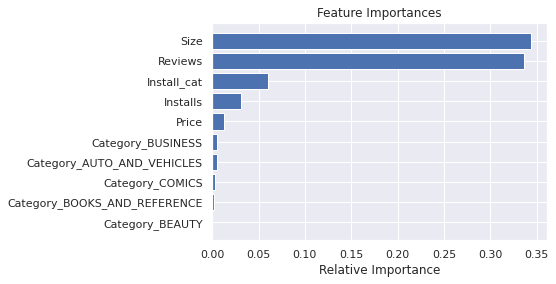



Train Score on Cat_encode : 1.0
Test Score on Cat_encode : 0.8468468468468469
[[  36  166]
 [ 157 1750]]
              precision    recall  f1-score   support

           0       0.19      0.18      0.18       202
           1       0.91      0.92      0.92      1907

    accuracy                           0.85      2109
   macro avg       0.55      0.55      0.55      2109
weighted avg       0.84      0.85      0.85      2109


 



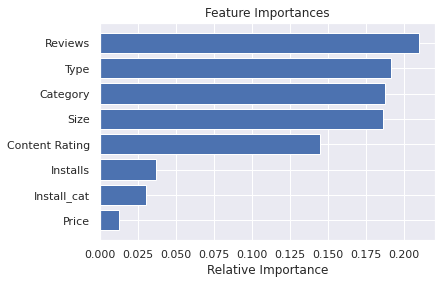

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dummy_model_building(dt)
print('\n')
cat_model_building(dt)

trained
Train Score on Dummy : 0.9997966653111021
Test Score on Dummy : 0.8933143669985776
[[1868   39]
 [ 186   16]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1907
           1       0.29      0.08      0.12       202

    accuracy                           0.89      2109
   macro avg       0.60      0.53      0.53      2109
weighted avg       0.85      0.89      0.86      2109


 



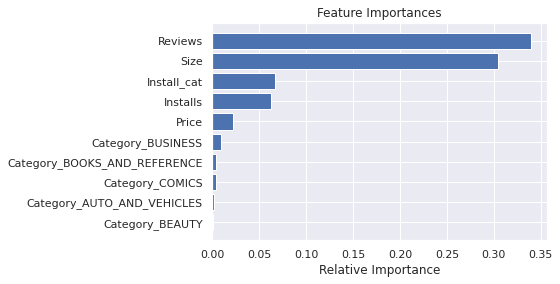



Train Score on Cat_encode : 1.0
Test Score on Cat_encode : 0.9009009009009009
[[   6  196]
 [  13 1894]]
              precision    recall  f1-score   support

           0       0.32      0.03      0.05       202
           1       0.91      0.99      0.95      1907

    accuracy                           0.90      2109
   macro avg       0.61      0.51      0.50      2109
weighted avg       0.85      0.90      0.86      2109


 



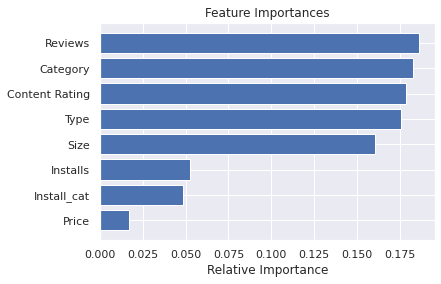

In [ ]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
dummy_model_building(rf)
print('\n')
cat_model_building(rf)


In [ ]:
# Bagging Classifier
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier()
dummy_model_building(bc)
print('\n')
cat_model_building(bc)


trained
Train Score on Dummy : 0.9843432289548597
Test Score on Dummy : 0.8871503082029398
[[1855   52]
 [ 186   16]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1907
           1       0.24      0.08      0.12       202

    accuracy                           0.89      2109
   macro avg       0.57      0.53      0.53      2109
weighted avg       0.84      0.89      0.86      2109


 

This model does not support Feature Selection


Train Score on Cat_encode : 0.9936966246441643
Test Score on Cat_encode : 0.8857278330962541
[[  27  175]
 [  66 1841]]
              precision    recall  f1-score   support

           0       0.29      0.13      0.18       202
           1       0.91      0.97      0.94      1907

    accuracy                           0.89      2109
   macro avg       0.60      0.55      0.56      2109
weighted avg       0.85      0.89      0.87      2109


 

This model does not support Feature Selection


trained
Train Score on Dummy : 0.9095160634404229
Test Score on Dummy : 0.9023233760075865
[[1901    6]
 [ 200    2]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1907
           1       0.25      0.01      0.02       202

    accuracy                           0.90      2109
   macro avg       0.58      0.50      0.48      2109
weighted avg       0.84      0.90      0.86      2109


 



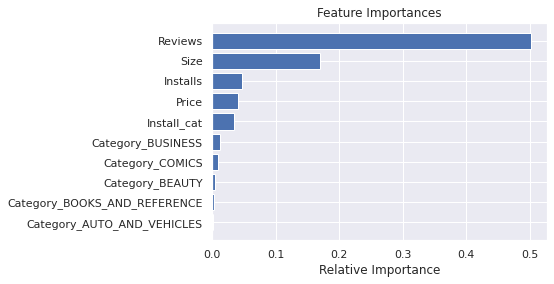



Train Score on Cat_encode : 0.909109394062627
Test Score on Cat_encode : 0.9013750592697961
[[   0  202]
 [   6 1901]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       202
           1       0.90      1.00      0.95      1907

    accuracy                           0.90      2109
   macro avg       0.45      0.50      0.47      2109
weighted avg       0.82      0.90      0.86      2109


 



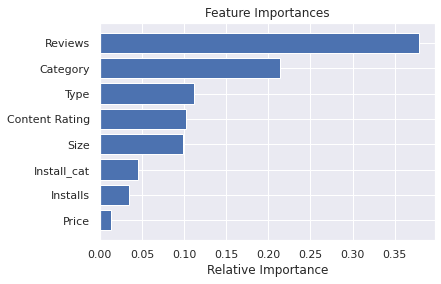

In [ ]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gc = GradientBoostingClassifier()
dummy_model_building(gc)
print('\n')
cat_model_building(gc)

trained
Train Score on Dummy : 0.9046360309068727
Test Score on Dummy : 0.903271692745377
[[1904    3]
 [ 201    1]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1907
           1       0.25      0.00      0.01       202

    accuracy                           0.90      2109
   macro avg       0.58      0.50      0.48      2109
weighted avg       0.84      0.90      0.86      2109


 



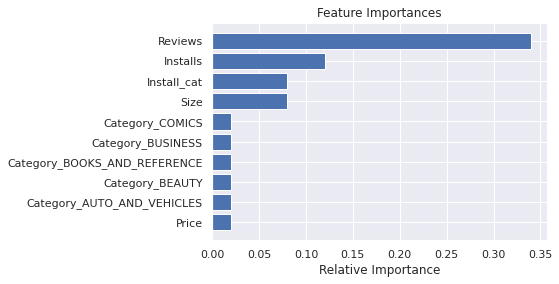



Train Score on Cat_encode : 0.9044326962179748
Test Score on Cat_encode : 0.9027975343764817
[[   0  202]
 [   3 1904]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       202
           1       0.90      1.00      0.95      1907

    accuracy                           0.90      2109
   macro avg       0.45      0.50      0.47      2109
weighted avg       0.82      0.90      0.86      2109


 



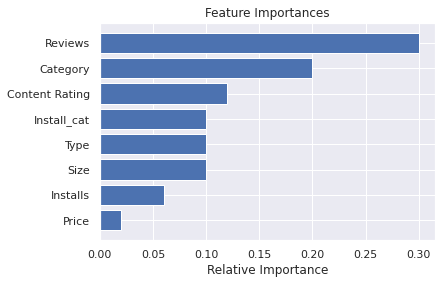

In [ ]:
# AdaBoosting
from sklearn.ensemble import AdaBoostClassifier

ac = AdaBoostClassifier()
dummy_model_building(ac)
print('\n')
cat_model_building(ac)


In [ ]:
# Stacking
from sklearn.ensemble import StackingClassifier
estimators = [('decisiontree', dt), ('randomforest', rf), ('bagging', bc), ('gradientboost', gc), ('Ada Boost', ac)]
sc = StackingClassifier(estimators)
dummy_model_building(sc)
print('\n')
cat_model_building(sc)


trained
Train Score on Dummy : 0.9131760878405856
Test Score on Dummy : 0.9027975343764817
[[1901    6]
 [ 199    3]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1907
           1       0.33      0.01      0.03       202

    accuracy                           0.90      2109
   macro avg       0.62      0.51      0.49      2109
weighted avg       0.85      0.90      0.86      2109


 

This model does not support Feature Selection


Train Score on Cat_encode : 0.9664497763318423
Test Score on Cat_encode : 0.9042200094831674
[[   4  198]
 [   4 1903]]
              precision    recall  f1-score   support

           0       0.50      0.02      0.04       202
           1       0.91      1.00      0.95      1907

    accuracy                           0.90      2109
   macro avg       0.70      0.51      0.49      2109
weighted avg       0.87      0.90      0.86      2109


 

This model does not support Feature Selection


# Conclusion:
1. Number of Reviews is contributing the most in predicting rating
2. Most of the ensemble models are biased toward majority class
3. Models are overfitting the trainning set
4. Ensemble models are able to predict with an accuarcy of 90%. However, we need to balance the class in order to improve the precision for minority class

In [ ]:
# SMOTE for data imbalance
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_dummy, y_dummy)

In [ ]:
x_train_sm,x_test_sm,y_train_sm,y_test_sm = train_test_split(X_res,y_res,test_size=0.3,random_state = 14,stratify=y_res)

In [ ]:
rf1 = RandomForestClassifier()
rf1.fit(x_train_sm,y_train_sm)
print('Train :{}'.format(rf1.score(x_train_sm,y_train_sm)))
print('Test :{}'.format(rf1.score(x_test_sm,y_test_sm)))

Train :0.9997752051253231
Test :0.9362706530291109


In [ ]:
gb = GradientBoostingClassifier()
gb.fit(x_train_sm,y_train_sm)
print('Train :{}'.format(gb.score(x_train_sm,y_train_sm)))
print('Test :{}'.format(gb.score(x_test_sm,y_test_sm)))

Train :0.9153647296841632
Test :0.9079464988198269


In [ ]:
sc1 = StackingClassifier(estimators)
sc1.fit(x_train_sm,y_train_sm)
print('Train :{}'.format(sc1.score(x_train_sm,y_train_sm)))
print('Test :{}'.format(sc1.score(x_test_sm,y_test_sm)))

Train :0.9957288973811397
Test :0.9367951744033569


After Balancing the class with SMOTE, the accuracy has increased by 3%.